# Tutorial Modelos de Ensamble tipo Random Forest

En este tutorial aplicaremos un modelo de ensamble tipo Random Forest a una serie de precios. Este tutorial se enfoca a generar una estructura en los datos que permita un pronóstico hacia adelante. Es decir, buscamos generar una estructura de ensamble a un conjunto de datos condicionados a eventos pasados, para luego generar un pronóstico futuro de los mismos. La serie por tanto genera una estructura de ensamble entrenada en una sección correspondiente de entrenamiento para luego generar un pronóstico hacia adelante en una estructura de datos transformada y mediante un modelo con refinamiento de parámetros.

**Contenido**
1. [Importación de librerías requeridas](#2)
1. [Importación de datos financieros](#3)
1. [Visualización de datos financieros](#4)
1. [Preprocesamiento de datos](#5)
1. [Partición de datos en entrenamiento y prueba](#6)
1. [Visualización conjunto de entrenamiento y prueba](#7)
1. [Regresión con Random Forest](#7a)
1. [Creación del Forecaster](#8)
1. [Predicciones en conjuto de prueba](#9)
1. [Refinamiento de los hiperparámetros](#10)
1. [Aplicación modelo óptimo a serie completa](#11)
1. [Generación del pronóstico hacia adelante](#12)
1. [Visualización del pronóstico futuro](#13)

<a id="2"></a> <br>
### 1. Importación de librerías requeridas

Importa las siguientes librerías para desarrollar este tutorial:

In [1]:
!pip install ipykernel
!pip install skforecast
!pip install skforecast[full]
!pip install skforecast==0.11.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.8/812.8 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 424.8/424.8 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 80.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 95.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 93.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip install yfinance --upgrade --no-cache-dir
!pip install pandas-datareader --upgrade --no-cache-dir

In [3]:
!pip uninstall numpy
!pip uninstall pandas

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/lib/python3.11/dist-packages/numpy-1.26.4.dist-info/*
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libopenblas64_p-r0-0cf96a72.3.23.dev.so
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.11/dist-packages/numpy/*
Proceed (Y/n)? Y
  Successfully uninstalled numpy-1.26.4
Found existing installation: pandas 2.1.4
Uninstalling pandas-2.1.4:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/pandas-2.1.4.dist-info/*
    /usr/local/lib/python3.11/dist-packages/pandas/*
Proceed (Y/n)? Y
  Successfully uninstalled pandas-2.1.4


In [4]:
!pip install numpy
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 41.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
skforecast 0.11.0 requires pandas<2.2,>=1.2, which is not installed.
holoviews 1.20.2 requires pandas>=1.3, which is not installed.
sklearn-pandas 2.2.0 requires pandas>=1.1.4, which is not installed.
seaborn 0.13.2 requires pandas>=1.2, which is not installed.
cudf-cu12 25.2.1 requires pandas<2.2.4dev0,>=2.0, which is not installed.
mlxtend 0.23.4 requires pandas>=0.24.2, which is not installed.
mizani 0.13.3 requires pandas>=2.2.0, which is not installed.
shap 0.47.1 requires pandas, which is not installed.
pandas-gbq 0.28.0 requires pandas>=1.1.4, which is not installed.
xarray 2025.1.2 requires pandas>=2.1, which is not installed.
fastai 2.7.19 requires 

In [5]:
!pip install numpy==1.24.3
!pip install pandas==2.0.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 54.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.5
    Uninstalling numpy-2.2.5:
      Successfully uninstalled numpy-2.2.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
skforecast 0.11.0 requires pandas<2.2,>=1.2, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.3 which is incompatible.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
blosc2 3.3.0 requires numpy>=1.26, but you have numpy 1.2

   ━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.5/12.2 MB 23.3 MB/s eta 0:00:01
ERROR: Operation cancelled by user
^C


In [1]:
# Estas son paqueterías complementarias para la descarga de datos financieros
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf

#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

#Plots
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [3]:
#Esta es requerida para importar los datos financieros
#!pip install yfinance

In [2]:
# Manipulación datos
import pandas
import numpy as np
import pandas as pd

from numpy import array
#from keras.models import Sequential
#from keras.layers import Dense
from numpy import asarray
from pandas import DataFrame
from pandas import concat

# Gráficos
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from matplotlib import pyplot
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

# Modelación y pronóstico
#Random Forest:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
##Regressor:
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.utils import save_forecaster
from skforecast.utils import load_forecaster

from joblib import dump, load


from datetime import datetime
from math import sqrt
# Configuración de warnings:
import warnings
# warnings.filterwarnings('ignore')

In [ ]:
##Si tienes problemas para descargar pandas datareader, puedes probar la siguiente línea:
#!pip install git+https://github.com/pydata/pandas-datareader.git

<a id="3"></a> <br>
### 2. Importación de datos financieros

Establecemos primeramente la fecha de inicio y fin, así como el activo o los activos de interés. En este ejemplo, emplearemos únicamente un activo, pero dejo desactivados otros ejemplos de stocks (stks), índices (idx), monedas (ccy) como ejemplos de otros activos.

In [3]:
#Establecemos las fechas de consulta:
start = '1970'
end = '2023'

In [4]:
#Una vez declarado el ticker, pedimos a través de la función de pandas data reader (pdr), bajar lso datos de la fuente de yahoo finance.
data = pdr.get_data_fred("GS10", start, end)
#pdr.get_data_fred('GS10')


In [5]:
data.tail()

,GS10
DATE,
2022-09-01,3.52
2022-10-01,3.98
2022-11-01,3.89
2022-12-01,3.62
2023-01-01,3.53


In [7]:
#Pasamos a data frame los datos
dt= pandas.DataFrame(data)
dt.head()

,GS10
DATE,
1970-01-01,7.79
1970-02-01,7.24
1970-03-01,7.07
1970-04-01,7.39
1970-05-01,7.91


In [8]:
#Damos un vistazo a los datos
dt.head()
dt.tail()
df= dt.rename(columns={'GS10': 'y'})
df.head()

,y
DATE,
1970-01-01,7.79
1970-02-01,7.24
1970-03-01,7.07
1970-04-01,7.39
1970-05-01,7.91


In [9]:
#Ahora, pasamos el data frame a un objeto de tiempo de pandas.
dataindex= pd.to_datetime(df.index)
dataindex

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01',
               '2022-08-01', '2022-09-01', '2022-10-01', '2022-11-01',
               '2022-12-01', '2023-01-01'],
              dtype='datetime64[ns]', name='DATE', length=637, freq=None)

<a id="4"></a> <br>
### 3. Visualización de datos financieros

Para mirar la serie, debemos importar la librería de matplotlib.

<a id="5"></a> <br>
### 4. Preprocesamiento de datos

En esta parte, debemos primero convertir nuestros datos tipo dataframe a un objeto de pandas con fecha. Igualmente, la parte de valores de la serie, como el precio, lo pasamos a un tipo NumPy array que facilitará el procesamiento.

<a id="6"></a> <br>
### 5. Partición de datos en entrenamiento y prueba

En esta seción, partimos el conjunto de datos de pueba y de entrenamiento.

Train dates : 1970-01-01 00:00:00 --- 2020-01-01 00:00:00  (n=601)
Test dates  : 2020-02-01 00:00:00 --- 2023-01-01 00:00:00  (n=36)


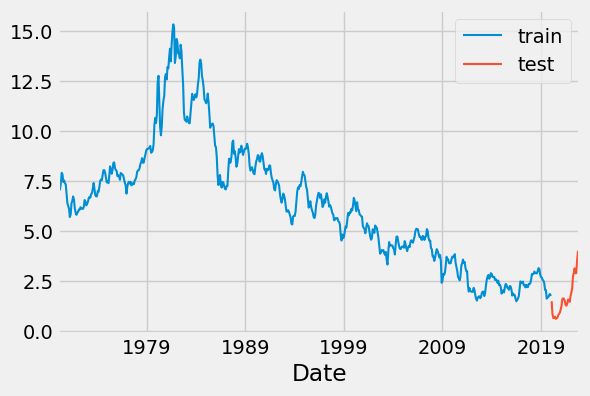

In [10]:
# Data preparation
df['Date'] = pd.to_datetime(df.index, format='%Y-%m-%d')
df = df.set_index('Date')
df = df.asfreq('MS')
df = df.sort_index()

# Split data into train-test
steps = 36
data_train = df[:-steps]
data_test  = df[-steps:]

print(f"Train dates : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Test dates  : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

fig, ax = plt.subplots(figsize=(6, 4))
data_train['y'].plot(ax=ax, label='train')
data_test['y'].plot(ax=ax, label='test')
ax.legend();

#Así también para las fechas:
date_train = dataindex[:-steps]
date_test = dataindex[-steps:]

In [11]:
#Identificamos la longitud de la serie
len(df)

637

In [12]:
#Vemos los datos para las fechas que nos sirven para las gráficas
date_train
#date_test  #Igualmente para visualizarlos

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01',
               '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01',
               '2019-12-01', '2020-01-01'],
              dtype='datetime64[ns]', name='DATE', length=601, freq=None)

In [13]:
#Imprimimos la longitud de ambos conjuntos de datos:
print(len(data_train))
print(len(data_test))

601
36


<a id="7"></a> <br>
### 6. Visualización conjunto de entrenamiento y prueba

Ahora verificamos como quedo la partición de nuestra serie de tiempo.

In [14]:
#Graficamos la serie anterior, aunando el valor del pronóstico.
trace1 = go.Scatter(
    x = date_train,
    y = data_train['y'],
    mode = 'lines',
    name = 'Data'
)

trace2 = go.Scatter(
    x = date_test,
    y = data_test['y'],
    mode = 'lines',
    name = 'test'
)

layout = go.Layout(
    title = "Bond ",
    xaxis = {'title' : "Date"},
    yaxis = {'title' : "Close"}
)
fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()

<a id="7a"></a> <br>
# Regresión con Random Forest
En esta sección, comenzaremos la regresión empleando el algoritmo de Random Forest. Para ello, comenzaremos con la creación de la estructura de datos tipo aprendizaje supervisado. Esto se hace mediante la función de ForecasterAutoreg.

<a id="8"></a> <br>
### 7. Creación del Forecaster

En esta sección aplicamos la función de Forecast Aurtoregress para la creación de ventanas con ciertos retrazos al cual se aplica el modelo de Random Forest. En este caso, consideramos 10 retrazos que capturan la estructura de datos de la serie y generan un pronóstico a 10 días. Esto significa que el modelo emplea los 10 días previos como predictores. Así, por ejemplo, si se tuviera una sección de prueba de 6 días, con un tamaño de ventana de 3 rezagos, la dimensión del conjunto de datos de prueba cuando se entrenara el modelo sería de (6x3):
* "Train"  "Pron"
* [1,2,3]   [4]
* [2,3,4]   [5]
* [3,4,5]   [6]
* [4,5,6]   [7]
* [5,6,7]   [8]
* [6,7,8]   [9]


In [15]:
# Creamos y entrenamos el modelo de Random Forest con la función de estructura de datos generada a través de la función Forecaster, en este caso, creando ventanas de 10 días:
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags = 12
                )

forecaster.fit(y=data_train['y'])
#forecaster

<a id="9"></a> <br>
### 8. Predicciones en conjunto de prueba


Verifiquemos el rendimiento del modelo entrenado en el conjunto de test o prueba.

In [16]:
# Pronóstico, en este caso elegimos una ventana de 36 días.
# ==============================================================================
steps = 36
predictions = forecaster.predict(steps=steps)
predictions.head(5)

2020-02-01    1.7839
2020-03-01    1.8013
2020-04-01    1.8519
2020-05-01    1.8652
2020-06-01    1.8852
Freq: MS, Name: pred, dtype: float64

In [17]:
# Determinamos el error de pronóstico:
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test['y'],
                y_pred = predictions
            )

print(f"Test error (mse): {error_mse}")
RMSE = sqrt(error_mse)
print(f"Test error (rmse): {RMSE}")

Test error (mse): 1.0806988991666662
Test error (rmse): 1.0395666881766972


<a id="10"></a> <br>
### 9. Refinamiento de los hiperparámetros

La función que entrena los datos emplea la configuración sugerida por el usuario donde el modelo de Random Forest aplica la configuración por default de los hiperparámetros. Sin embargo, no existe sustento que esta configuración sea la ideal. Por tanto y para encontrar la mejor combinación de retrazos e hiperparámetros, podemos emplear la librería de Skforecast la cual provee la función de búsqueda con los parámetros que minimicen la métrica de error. Con esta configuración, podemos posteriormente ajustar el modelo para el pronóstico.

In [18]:
!pip install statsmodels

In [18]:
from statsmodels.tsa.stattools import adfuller
adfuller(dt)

(-1.3969365623105592,
 0.5837438846688745,
 12,
 624,
 {'1%': -3.440873084361836,
  '5%': -2.866182929627575,
  '10%': -2.5692425987220577},
 144.79488764713597)

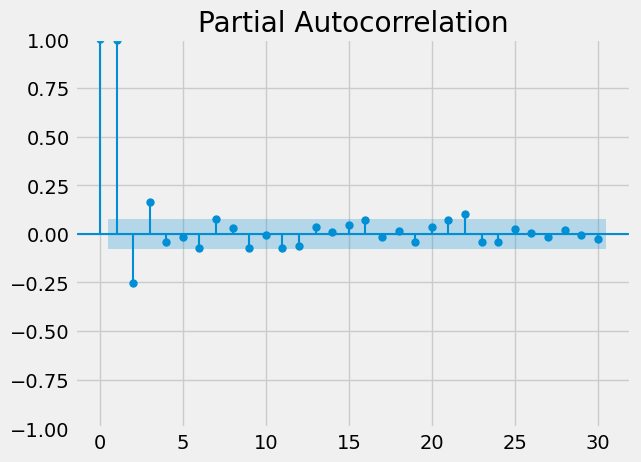

In [19]:
##Aplicamos una diferenciación y revisamos features:
from statsmodels.graphics.tsaplots import plot_pacf
ddt = dt.diff().dropna()
plot_pacf(dt, lags=30)
pyplot.show()

In [20]:
# Cálculo de hiperparámetros por grid search
# ==============================================================================
steps = 36
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 12 #
             )

# Lags used as predictors
lags_grid = [10,[1,2,3]]

# Regressor's hyperparameters
param_grid = {'n_estimators': [100, 200],
              'max_depth': [3,5, 10]}

# Set initial_train_size to a smaller value, e.g., 80% of the training data length
initial_train_size = int(len(data_train) * 0.8)

results_grid = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = data_train['y'],
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = True,
                        metric             = 'mean_squared_error',
                        initial_train_size = initial_train_size, # Use the calculated value
                        fixed_train_size   = False,
                        return_best        = True,
                        verbose            = False
               )

Number of models compared: 12.


lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/6 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3] 
  Parameters: {'max_depth': 10, 'n_estimators': 200}
  Backtesting metric: 0.6783069395658845



In [21]:
# Visualizamos los resultados del grid search
# ==============================================================================
results_grid

,lags,params,mean_squared_error,max_depth,n_estimators
11,"[1, 2, 3]","{'max_depth': 10, 'n_estimators': 200}",0.678307,10,200
2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 5, 'n_estimators': 100}",0.679462,5,100
4,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 10, 'n_estimators': 100}",0.684328,10,100
3,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 5, 'n_estimators': 200}",0.685318,5,200
10,"[1, 2, 3]","{'max_depth': 10, 'n_estimators': 100}",0.686506,10,100
5,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 10, 'n_estimators': 200}",0.686917,10,200
9,"[1, 2, 3]","{'max_depth': 5, 'n_estimators': 200}",0.704566,5,200
8,"[1, 2, 3]","{'max_depth': 5, 'n_estimators': 100}",0.714219,5,100
1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 3, 'n_estimators': 200}",0.795196,3,200
0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 3, 'n_estimators': 100}",0.806695,3,100


<a id="11"></a> <br>
### 10. Aplicación modelo óptimo a serie completa

A partir de la salida anterior, ¿cuáles deberían las variables a escoger para entrenar el modelo?

In [22]:
# Configuramos la función de pronóstico de forecaster con la mejor combinación obtenida de hiperparámetros.
#
regressor = RandomForestRegressor(max_depth= 10, n_estimators=200 , random_state=123)
### Hasta aquí modificas

forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 12
                )

forecaster.fit(y=df['y'])
f = forecaster.fit(y=df['y'])

In [23]:
#from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregMultiSeriesCustom import ForecasterAutoregMultiSeriesCustom

In [24]:
# Podemos imprimir la importancia de los rezagos

#print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
forecaster.get_feature_importances()

,feature,importance
0,lag_1,0.984316
1,lag_2,0.005789
2,lag_3,0.001701
3,lag_4,0.002265
4,lag_5,0.000747
5,lag_6,0.000639
6,lag_7,0.000563
7,lag_8,0.001572
8,lag_9,0.000468
9,lag_10,0.000526


Como podemos ver, los primeros tres rezagos son los que más aportan al modelo.

<a id="12"></a> <br>
### 11. Generación del pronóstico hacia adelante

Una vez que el modelo es entrenado, se genera el pronóstico futuro.

In [25]:
# Pronóstico, en este caso elegimos una ventana de 12 días.
# ==============================================================================
steps = 12
predictions = forecaster.predict(steps=steps)
predictions.head(5)

2023-02-01    3.481510
2023-03-01    3.399121
2023-04-01    3.528305
2023-05-01    3.502440
2023-06-01    3.526105
Freq: MS, Name: pred, dtype: float64

In [26]:
fin = data_test.index.max()
fin

Timestamp('2023-01-01 00:00:00')

In [27]:
## Generamos las fechas a dichos pronósticos mediante la función de pandas date_range:
fin = data_test.index.max()   #Partimos de la fecha máxima de la sección de prueba, hacia adelante.
fwd_dates = pd.date_range(fin, periods=12, freq='M').tolist()
fwd_dates

[Timestamp('2023-01-31 00:00:00'),
 Timestamp('2023-02-28 00:00:00'),
 Timestamp('2023-03-31 00:00:00'),
 Timestamp('2023-04-30 00:00:00'),
 Timestamp('2023-05-31 00:00:00'),
 Timestamp('2023-06-30 00:00:00'),
 Timestamp('2023-07-31 00:00:00'),
 Timestamp('2023-08-31 00:00:00'),
 Timestamp('2023-09-30 00:00:00'),
 Timestamp('2023-10-31 00:00:00'),
 Timestamp('2023-11-30 00:00:00'),
 Timestamp('2023-12-31 00:00:00')]

<a id="13"></a> <br>
### 12. Visualización del pronóstico futuro

A continuación verás graficamente las tres series de tiempo (train, test y forecast). El gráfico es interactivo, amplia la zona donde están las series de test y forecast.

In [28]:
## Graficamos la serie anterior, aunando el valor del pronóstico.

trace3 = go.Scatter(
    x = date_test,
    y = data_test['y'],
    mode = 'lines',
    name = 'Test'
)

trace4 = go.Scatter(
    x = fwd_dates,
    y = predictions,
    mode = 'lines',
    name = 'Pronóstico Futuro Random Forest'
)

trace1 = go.Scatter(
    x = date_train,
    y = data_train['y'],
    mode = 'lines',
    name = 'Train'
    )

layout = go.Layout(
    title = "Bond",
    xaxis = {'title' : "Date"},
    yaxis = {'title' : "Close"}
)
fig = go.Figure(data=[trace1, trace3, trace4], layout=layout)
fig.show()

En este tutorial aprendiste un proceso para la generación de pronósticos futuros de una serie financiera mediante modelos de ensamble tipo Random Forest. En el proceso, reiteramos la importancia de transformar los datos de una serie de tiempo en una estructura de datos que permiten generar secuencias de entrenamiento y pronóstico de la serie con base en datos históricos. Este proceso se debe hacer especialmente cuando deseamos generar un pronóstico hacia adelante en series de tiempo. Dicho proceso es muy similar al que se emplea cuando aplicamos un problema supervisado tal como una regresión lineal o modelos regresivos, donde se generan los retrasos o lags de la serie y cuyos features ingresan al modelo de regresión. En este caso, se crea una estructura en la cual se puede emplear para entrenar un modelo de ensamble cuyo proceso puede ser tedioso. Para ello, existen funciones que ayudan es esa tarea, en el caso particular de este tutorial, empleamos la función de Forecaster Autoregressor que crea la estructura de datos y aplica el modelo de Random Forest con los parámetros suministrados. Una vez obtenido el modelo se genera el pronóstico futuro especificando la serie a emplear.

## Ejemplo multivariado

In [30]:
import yfinance as yf
import pandas as pd
from pandas_datareader import data as pdr
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import grid_search_forecaster
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt

In [134]:
#Establecemos las fechas de consulta:
start = '2019-01-01'
end = '2022-07-29'
#data = pdr.get_data_yahoo(ticker, start, end)['Adj Close']


In [135]:
#Una vez declarado el ticker, pedimos a través de la función de pandas data reader (pdr), bajar lso datos de la fuente de yahoo finance.
#
datam = yf.download(['SPY','TSLA', 'META'], start=start, end=end)['Close']

#Pasamos a data frame los datos
dtm =  pd.DataFrame(datam)
dtm.head()

[*********************100%***********************]  3 of 3 completed


Ticker,META,SPY,TSLA
Date,,,
2019-01-02,135.043533,226.954758,20.674667
2019-01-03,131.122025,221.539017,20.024000
2019-01-04,137.302902,228.959610,21.179333
2019-01-07,137.402420,230.764877,22.330667
2019-01-08,141.861404,232.932953,22.356667


In [136]:
#Damos un vistazo a los datos
dtm.head()
dtm.tail()
dfm= dtm.rename(columns={'SPY': 'y', "TSLA":'x1', "META":'x2'})
dfm.head()

Ticker,x2,y,x1
Date,,,
2019-01-02,135.043533,226.954758,20.674667
2019-01-03,131.122025,221.539017,20.024000
2019-01-04,137.302902,228.959610,21.179333
2019-01-07,137.402420,230.764877,22.330667
2019-01-08,141.861404,232.932953,22.356667


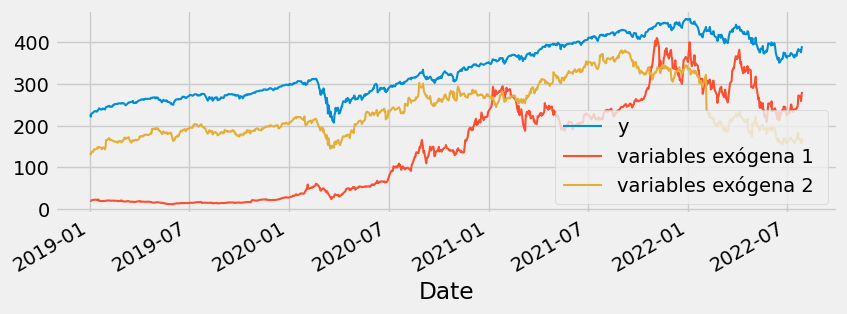

In [137]:
fig, ax = plt.subplots(figsize=(9, 3))
dfm['y'].plot(ax=ax, label='y')
dfm['x1'].plot(ax=ax, label='variables exógena 1 ')
dfm['x2'].plot(ax=ax, label='variables exógena 2 ')
ax.legend();

In [138]:
# Data preparation
dfm['Date'] = pd.to_datetime(dfm.index, format='%Y-%m-%d')
dfm = dfm.set_index('Date')
dfm = dfm.asfreq('B')
dfm = dfm.sort_index()

# Split data into train-test
steps = 36
data_trainm = dfm[:-steps]
data_testm  = dfm[-steps:]

print(f"Train dates : {data_trainm.index.min()} --- {data_trainm.index.max()}  (n={len(data_trainm)})")
print(f"Test dates  : {data_testm.index.min()} --- {data_testm.index.max()}  (n={len(data_testm)})")

#fig, ax = plt.subplots(figsize=(6, 4))
#data_trainm['y'].plot(ax=ax, label='train')
#data_test['y'].plot(ax=ax, label='test')
#ax.legend();

#Así también para las fechas:
date_trainm = dataindex[:-steps]
date_testm = dataindex[-steps:]

Train dates : 2019-01-02 00:00:00 --- 2022-06-08 00:00:00  (n=896)
Test dates  : 2022-06-09 00:00:00 --- 2022-07-28 00:00:00  (n=36)


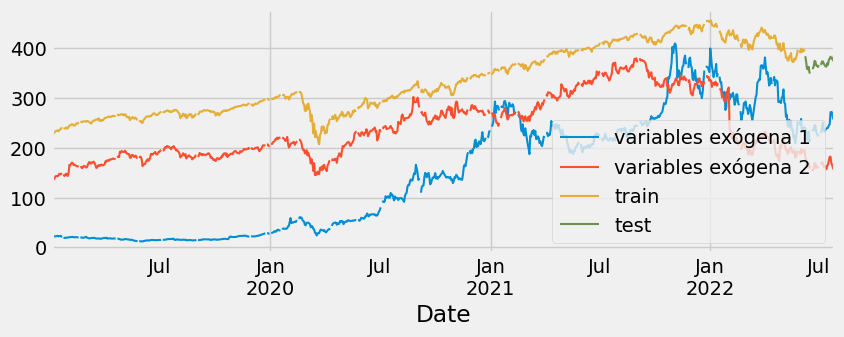

In [139]:
fig, ax = plt.subplots(figsize=(9, 3))
#dfm['y'].plot(ax=ax, label='y')
dfm['x1'].plot(ax=ax, label='variables exógena 1 ')
dfm['x2'].plot(ax=ax, label='variables exógena 2 ')
data_trainm['y'].plot(ax=ax, label='train')
data_testm['y'].plot(ax=ax, label='test')
ax.legend();

In [140]:
## Imputamos algún valor faltante con el valor anterior.
dfm.fillna(method='bfill', inplace=True)

In [141]:
# Podemos verificar si valores faltantes.
print(f'Number of rows with missing values: {dfm.isnull().any(axis=1).mean()}')

Number of rows with missing values: 0.0


In [144]:
#Ahora, pasamos el data frame a un objeto de tiempo de pandas.
dataindexm= pd.to_datetime(dfm.index)
dataindexm

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2022-07-15', '2022-07-18', '2022-07-19', '2022-07-20',
               '2022-07-21', '2022-07-22', '2022-07-25', '2022-07-26',
               '2022-07-27', '2022-07-28'],
              dtype='datetime64[ns]', name='Date', length=932, freq='B')

In [146]:
#Imprimimos la longitud de ambos conjuntos de datos:
print(len(data_trainm))
print(len(data_testm))

896
36


In [147]:
# Create and fit forecaster
forecasterm = ForecasterAutoreg(
                 regressor       = RandomForestRegressor(random_state=123),
                 lags            = 12,
                 differentiation = None #Precaución, es el # de diferenciaciones apñicadas a la serie previo el entrenamiento.
             )

forecasterm.fit(y=data_trainm['y'], exog=data_trainm[['x1', 'x2']])
forecasterm

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12] 
Transformer for y: None 
Transformer for exog: None 
Window size: 12 
Weight function included: False 
Differentiation order: None 
Exogenous included: True 
Type of exogenous variable: <class 'pandas.core.frame.DataFrame'> 
Exogenous variables names: ['x1', 'x2'] 
Training range: [Timestamp('2019-01-02 00:00:00'), Timestamp('2022-06-08 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: B 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
fit_kwargs: {} 
Creation date: 2025-04-21 19:04:26 
Last fit date: 2

In [148]:
# Predict
predictionsm = forecasterm.predict(steps= 36, exog=data_testm[['x1', 'x2']])
predictionsm.head(5)

,pred
2022-06-09,392.744796
2022-06-10,392.666742
2022-06-13,393.068094
2022-06-14,391.728427
2022-06-15,390.480850


In [149]:
# Feature importances
forecasterm.get_feature_importances()

,feature,importance
0,lag_1,0.352962
1,lag_2,0.066559
2,lag_3,0.090238
3,lag_4,0.018708
4,lag_5,0.199481
5,lag_6,0.008454
6,lag_7,0.009052
7,lag_8,0.049892
8,lag_9,0.025199
9,lag_10,0.041763


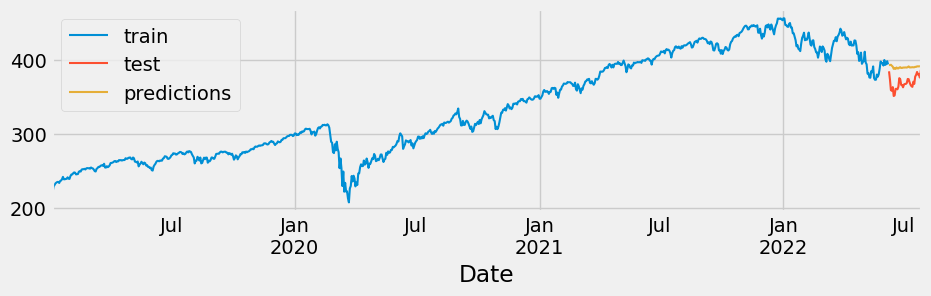

In [150]:
# Plot predictions versus test data
fig, ax = plt.subplots(figsize=(10, 2.5))
data_trainm['y'].plot(ax=ax, label='train')
data_testm['y'].plot(ax=ax, label='test')
predictionsm.plot(ax=ax, label='predictions')
ax.legend();

In [151]:
# Test error
error_mse = mean_squared_error(
                y_true = data_testm['y'],
                y_pred = predictionsm
            )

print(f"Test error (MSE): {error_mse}")

Test error (MSE): 499.90894716837687


In [157]:
# Hyperparameter grid search=

# Candidate values for regressor's hyperparameters
param_grid = {
    'n_estimators': [100, 500],
    'max_depth': [5, 10]
}

results_grid = grid_search_forecaster(
    forecaster         = forecasterm, #el modelo anterior ya entrenado
    y                  = data_trainm['y'],
    exog               = data_trainm[['x1', 'x2']],  # agregar estoen caso multivariado
    param_grid         = param_grid,
    lags_grid          = lags_grid,
    steps              = steps,
    refit              = True,  #para que entrene con el mejor modelo
    metric             = 'mean_squared_error',
    initial_train_size = int(len(data_train)*0.5),
    fixed_train_size   = False,
    return_best        = True,
    n_jobs             = 'auto',
    verbose            = False
)

Number of models compared: 8.


lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/4 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10] 
  Parameters: {'max_depth': 10, 'n_estimators': 100}
  Backtesting metric: 308.0851957281663



In [158]:
# Search results
results_grid

,lags,params,mean_squared_error,max_depth,n_estimators
2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 10, 'n_estimators': 100}",308.085196,10,100
6,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 10, 'n_estimators': 100}",314.740352,10,100
3,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 10, 'n_estimators': 500}",323.155376,10,500
7,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 10, 'n_estimators': 500}",325.266300,10,500
4,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 5, 'n_estimators': 100}",338.327328,5,100
5,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 5, 'n_estimators': 500}",339.432760,5,500
0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 5, 'n_estimators': 100}",348.014101,5,100
1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 5, 'n_estimators': 500}",350.180428,5,500


In [ ]:
# Pronóstico Futuro. Ensamble del modelo en la serie completa.

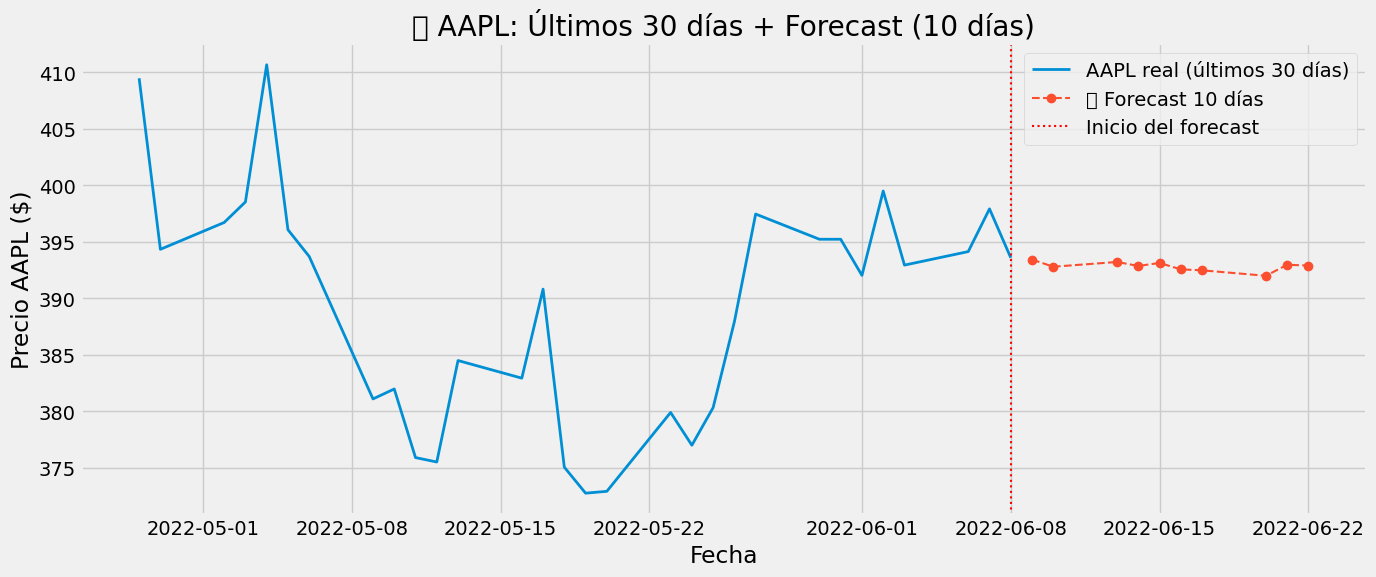

In [162]:
# Aquí usamos las últimas observaciones para proyectar futuro
last_known_exog = data_trainm[['x1', 'x2']].iloc[-1]
future_exog = pd.DataFrame([last_known_exog] * 10, columns=['x1', 'x2'])
future_exog.index = pd.date_range(start=data_trainm.index[-1] + pd.Timedelta(days=1), periods=10, freq='B')

forecast_future = forecasterm.predict(steps=10, exog=future_exog)

# Visualización final


plt.figure(figsize=(14, 6))
plt.plot(data_trainm['y'].iloc[-30:], label='AAPL real (últimos 30 días)', linewidth=2)
plt.plot(forecast_future.index, forecast_future, label='Forecast 10 días', linestyle='--', marker='o')
plt.axvline(x=data_trainm.index[-1], color='red', linestyle=':', label='Inicio del forecast')
plt.title('📈 AAPL: Últimos 30 días + Forecast (10 días)')
plt.xlabel('Fecha')
plt.ylabel('Precio AAPL ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [85]:
# ## Usando ventanas deslizantes, pronosticando igualmente a las
# variables exógenas. %% Entrenar modelos FR para x1 y x2, 2) Predecir x1 y x2
# para la ventana futura, 3) Usar estos pronósticos como exógenas para Y %%

In [168]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import grid_search_forecaster
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt

# 1. Grid Search para TSLA (x1)
forecaster_tsla = ForecasterAutoreg(
    regressor = RandomForestRegressor(random_state=123),
    lags = 12
)

results_tsla = grid_search_forecaster(
    forecaster         = forecaster_tsla,
    y                  = data_trainm['x1'],
    param_grid         = param_grid,
    lags_grid          = lags_grid,
    steps              = 10,
    metric             = 'mean_squared_error',  #
    refit              = True,
    return_best        = True,
    initial_train_size = int(len(data_trainm)*0.5),
    fixed_train_size   = False,
    verbose            = False
)

Number of models compared: 8.


lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/4 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
  Parameters: {'max_depth': 5, 'n_estimators': 100}
  Backtesting metric: 506.48403193848833



In [165]:

# 2. Grid Search para META (x2)

forecaster_meta = ForecasterAutoreg(
    regressor = RandomForestRegressor(random_state=123),
    lags = 12
)
results_meta = grid_search_forecaster(
    forecaster         = forecaster_meta,
    y                  = data_trainm['x2'],
    param_grid         = param_grid,
    lags_grid          = lags_grid,
    steps              = 10,
    metric             = 'mean_squared_error',  #
    refit              = True,
    return_best        = True,
    initial_train_size = int(len(data_trainm)*0.5),
    fixed_train_size   = False,
    verbose            = False
)


# 3. Pronóstico futuro de x1 (TSLA) y x2 (META)
forecast_x1 = forecaster_tsla.predict(steps=10)
forecast_x2 = forecaster_meta.predict(steps=10)

# Combinar en DataFrame para exógenas
future_exog = pd.concat([forecast_x1, forecast_x2], axis=1)
future_exog.columns = ['x1', 'x2']
future_exog.index = pd.date_range(start=data_trainm.index[-1] + pd.Timedelta(days=1), periods=10, freq='B')


# 4. Usar modelo y optimizado (ya refitteado) para pronóstico
forecast_y = forecasterm.predict(steps=10, exog=future_exog)

Number of models compared: 8.


lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/4 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10] 
  Parameters: {'max_depth': 10, 'n_estimators': 100}
  Backtesting metric: 167.60977521583143



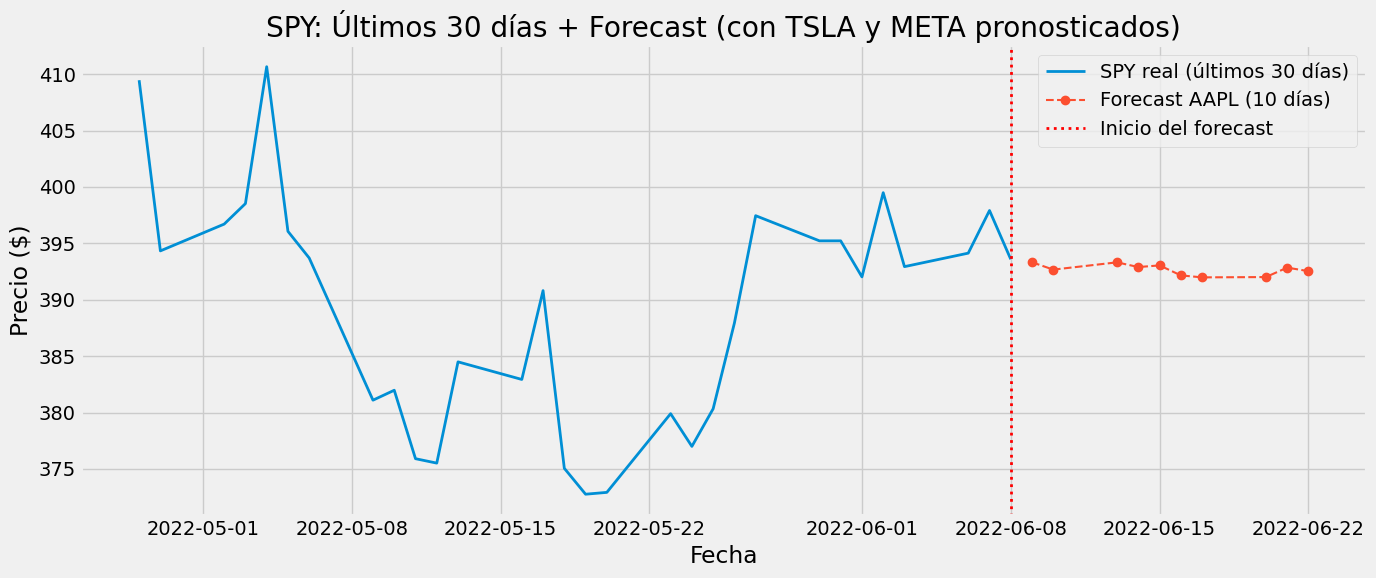

In [166]:
# --------------------------------------------
# 5. Visualización
# --------------------------------------------
n_recent = 30
recent_dates = data_trainm.index[-n_recent:]
recent_values = data_trainm['y'].iloc[-n_recent:]

plt.figure(figsize=(14, 6))
plt.plot(recent_dates, recent_values, label='SPY real (últimos 30 días)', linewidth=2)
plt.plot(forecast_y.index, forecast_y, label='Forecast AAPL (10 días)', linestyle='--', marker='o')
plt.axvline(x=recent_dates[-1], color='red', linestyle=':', linewidth=2, label='Inicio del forecast')
plt.title('SPY: Últimos 30 días + Forecast (con TSLA y META pronosticados)')
plt.xlabel('Fecha')
plt.ylabel('Precio ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [167]:
print(forecast_x1)
print(forecast_x2)


2022-06-09    244.861595
2022-06-10    244.861595
2022-06-13    246.572761
2022-06-14    246.881067
2022-06-15    246.951176
2022-06-16    246.951176
2022-06-17    246.951176
2022-06-20    246.951176
2022-06-21    246.737017
2022-06-22    246.737017
Freq: B, Name: pred, dtype: float64
2022-06-09    193.025134
2022-06-10    193.209646
2022-06-13    192.916733
2022-06-14    193.762891
2022-06-15    193.004461
2022-06-16    192.139510
2022-06-17    190.603421
2022-06-20    193.065609
2022-06-21    193.038984
2022-06-22    192.228766
Freq: B, Name: pred, dtype: float64


**Referencia:**

 Este tutorial emplea la función ForecasterAutoreg de la paquetería skforecast (https://pypi.org/project/skforecast/).

 Ceballos, F. 2019. Stacking classifiers for higher predictive performance. Towards Data Science. Retrieved from: https://towardsdatascience.com/stacking-classifiers-for-higher-predictive-performance-566f963e4840